In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [402]:
df = pd.read_csv('/content/Train_data.csv')
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [404]:
df.shape

(7160, 14)

In [405]:
#Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [406]:
df['Garden'].isna().sum()

np.int64(7)

In [407]:
df['Garden'].value_counts()

,count
Garden,
O,3602
V,3551


In [408]:
df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [409]:
# See which columns have the most nulls
null_counts = df.isna().sum()
null_percentage = (df.isna().sum() / len(df)) * 100
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'percentage': null_percentage
}).sort_values('percentage', ascending=False)

print(null_summary[null_summary['null_count'] > 0])

                    null_count  percentage
Date_of_Occupancy          508    7.094972
Building Dimension         106    1.480447
Geo_Code                   102    1.424581
Garden                       7    0.097765


In [410]:
df['Date_of_Occupancy'] = df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median())
df['Building Dimension'] = df['Building Dimension'].fillna(df['Building Dimension'].median())
df['Garden'] = df['Garden'].fillna(df['Garden'].mode()[0])
df['Geo_Code'] = df['Geo_Code'].fillna(df['Geo_Code'].mode()[0])

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [412]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [413]:
df['Building_Type'].unique()

array([1, 2, 4, 3])

In [414]:
df['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [415]:
df[df['NumberOfWindows'] == '   .']

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
6,H7390,2012,1.000000,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,1083.0,1,2001.0,.,6088,0
7156,H5926,2013,1.000000,0,V,V,V,U,1083.0,2,1980.0,.,6088,1
7157,H6204,2016,0.038251,0,V,V,V,U,1083.0,1,1992.0,.,6088,0
7158,H6537,2013,1.000000,0,V,V,V,U,1083.0,1,1972.0,.,6088,0


In [416]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('   .', 0)

In [417]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [418]:
df['Claim'].unique()

array([0, 1])

In [419]:
df.drop('Customer Id', axis=1, inplace=True)

In [420]:
df['Building_Age'] = df['YearOfObservation'] - df['Date_of_Occupancy']

In [421]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Age
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0,53.0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,165.0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0,54.0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0,53.0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,214.0


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7160 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Geo_Code            7160 non-null   object 
 12  Claim               7160 non-null   int64  
 13  Building_Age        7160 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 783.3+ KB


In [423]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('>=10', '10')

In [424]:
# Check current data type and unique values
print(df['NumberOfWindows'].dtype)
print(df['NumberOfWindows'].value_counts())


# Convert entire column to integer
df['NumberOfWindows'] = df['NumberOfWindows'].astype(int)

# Verify
print(df['NumberOfWindows'].dtype)
print(df['NumberOfWindows'].value_counts())

object
NumberOfWindows
0     3551
4      939
3      844
5      639
2      363
6      306
7      211
8      116
1       75
10      67
9       49
Name: count, dtype: int64
int64
NumberOfWindows
0     3551
4      939
3      844
5      639
2      363
6      306
7      211
8      116
1       75
10      67
9       49
Name: count, dtype: int64


In [425]:
df['Windows_per_Sqm'] = df['NumberOfWindows'] / df['Building Dimension']

In [426]:
df['Period_Bin'] = pd.cut(df['Insured_Period'], bins=[0, 0.5, 0.99, 1.0], labels=['Short (<6m)', 'Medium', 'Full Year'])

In [427]:
# Create an Exposure Index
df['Exposure_Index'] = df['Building Dimension'] * df['Insured_Period']

In [428]:
geo_risk = df.groupby('Geo_Code')['Claim'].mean()
df['Geo_Risk_Score'] = df['Geo_Code'].map(geo_risk)

# IMPORTANT: For the rows where you don't know the claim (Test set),
# you will fill NaNs with the global average claim rate.
global_mean = df['Claim'].mean()
df['Geo_Risk_Score'] = df['Geo_Risk_Score'].fillna(global_mean)

In [429]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Age,Windows_per_Sqm,Period_Bin,Exposure_Index,Geo_Risk_Score
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0,53.0,0.000000,Full Year,290.0,0.0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,165.0,0.008163,Full Year,490.0,0.0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0,54.0,0.000000,Full Year,595.0,0.0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0,53.0,0.000000,Full Year,2840.0,0.0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,214.0,0.004412,Full Year,680.0,0.0


In [430]:
# 1. Create the bins
# We use -1 for the lower bound to ensure '0' is captured safely.
# We use np.inf for the upper bound to automatically capture 469 or anything higher.
bins = [-1, 5, 30, 60, 100, np.inf]

# 2. Create professional labels matching the bins
labels = [
    'New (0-5)',
    'Modern (6-30)',
    'Mid-Lifecycle (31-60)',
    'Aging (61-100)',
    'Heritage (100+)'
]

# 3. Apply the grouping
df['Building_Age_Group'] = pd.cut(df['Building_Age'], bins=bins, labels=labels)

# 4. Verification
print("Group Distribution:")
print(df['Building_Age_Group'].value_counts().sort_index())

Group Distribution:
Building_Age_Group
New (0-5)                 368
Modern (6-30)            1232
Mid-Lifecycle (31-60)    4316
Aging (61-100)            646
Heritage (100+)           598
Name: count, dtype: int64


No Claim (0): 77.18%
Claim (1): 22.82%


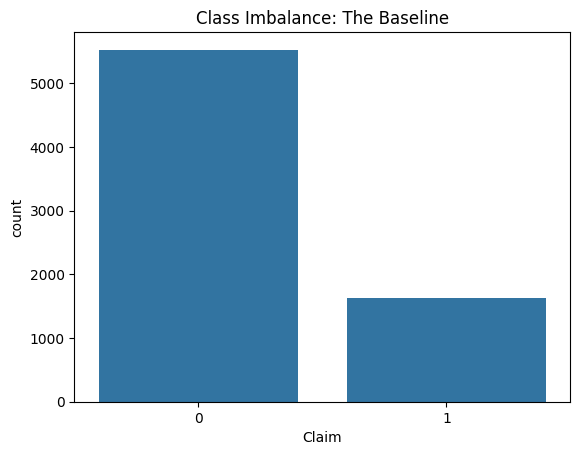

In [431]:
# Calculate the percentage
claim_rate = df['Claim'].value_counts(normalize=True) * 100
print(f"No Claim (0): {claim_rate[0]:.2f}%")
print(f"Claim (1): {claim_rate[1]:.2f}%")

# Visualize
sns.countplot(x='Claim', data=df)
plt.title('Class Imbalance: The Baseline')
plt.show()

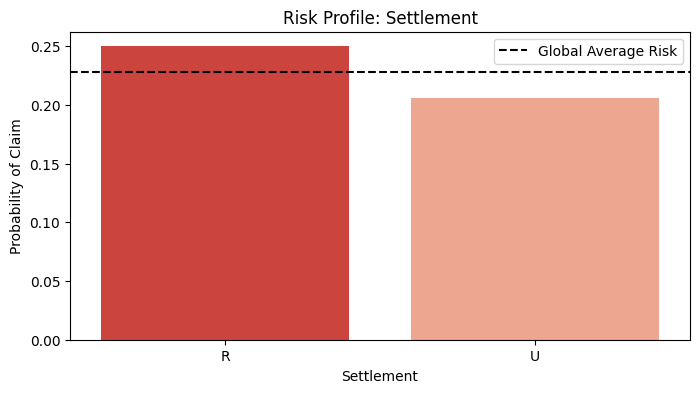

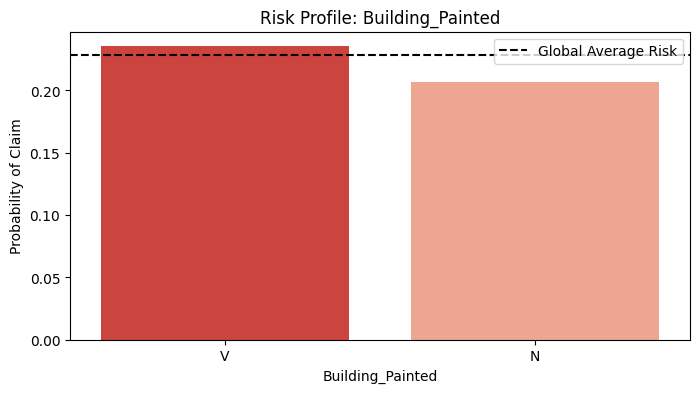

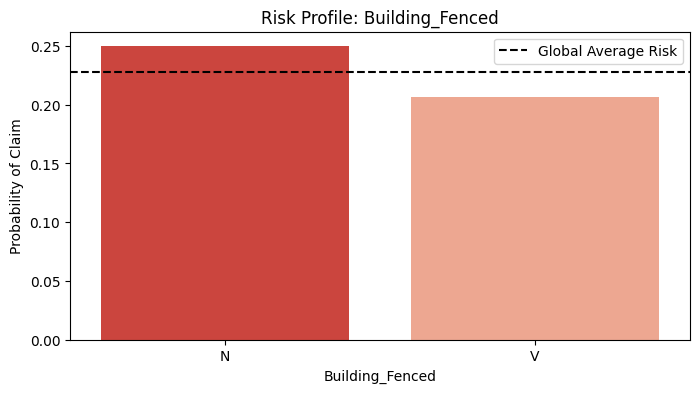

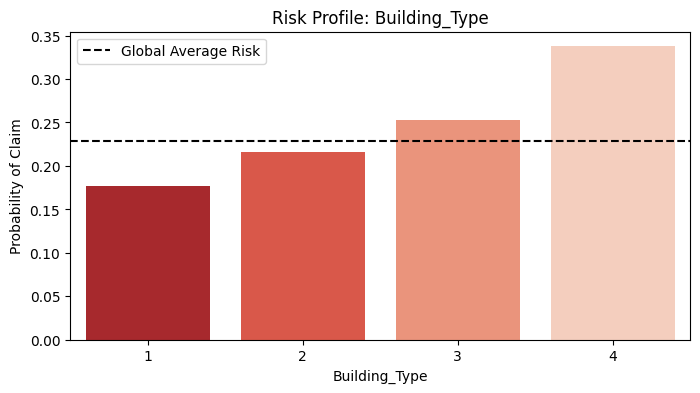

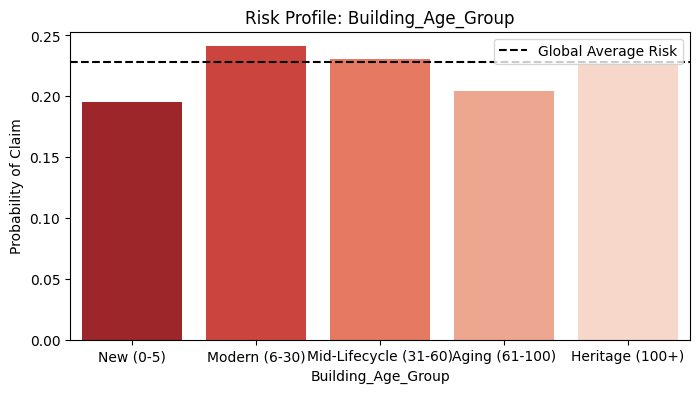

In [432]:
def plot_claim_rate(col):
    # Calculate the mean of 'Claim' (which gives the probability)
    risk_profile = df.groupby(col)['Claim'].mean().reset_index().sort_values('Claim', ascending=False)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='Claim', data=risk_profile, palette='Reds_r')
    plt.ylabel('Probability of Claim')
    plt.title(f'Risk Profile: {col}')
    plt.axhline(df['Claim'].mean(), color='k', linestyle='--', label='Global Average Risk')
    plt.legend()
    plt.show()

# Run this for your key categorical features
cols_to_check = ['Settlement', 'Building_Painted', 'Building_Fenced', 'Building_Type', 'Building_Age_Group']

for col in cols_to_check:
    plot_claim_rate(col)

Short Duration (<6m): The probability of a claim is roughly 10% (0.10).

Full Year: The probability jumps to roughly 24% (0.24).

Interpretation: A building insured for a full year is more than 2x as likely to have a claim than one insured for less than 6 months. This confirms that Insured_Period is not just "metadata"; it is a fundamental driver of the target variable.

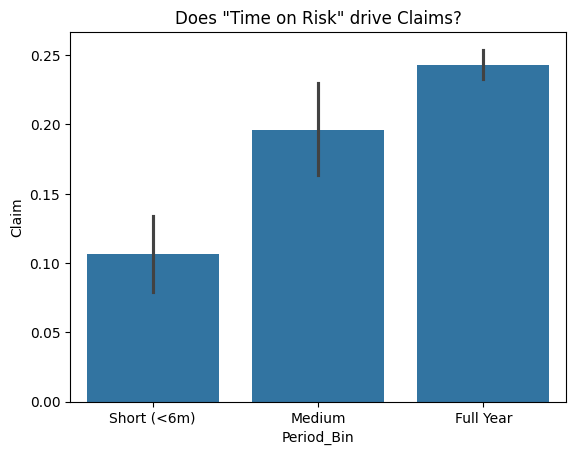

In [433]:
sns.barplot(x='Period_Bin', y='Claim', data=df)
plt.title('Does "Time on Risk" drive Claims?')
plt.show()

In [434]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Age,Windows_per_Sqm,Period_Bin,Exposure_Index,Geo_Risk_Score,Building_Age_Group
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0,53.0,0.000000,Full Year,290.0,0.0,Mid-Lifecycle (31-60)
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,165.0,0.008163,Full Year,490.0,0.0,Heritage (100+)
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0,54.0,0.000000,Full Year,595.0,0.0,Mid-Lifecycle (31-60)
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0,53.0,0.000000,Full Year,2840.0,0.0,Mid-Lifecycle (31-60)
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,214.0,0.004412,Full Year,680.0,0.0,Heritage (100+)


In [435]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [436]:
df['Building_Painted'] = lb.fit_transform(df['Building_Painted'])
df['Building_Fenced'] = lb.fit_transform(df['Building_Fenced'])
df['Garden'] = lb.fit_transform(df['Garden'])
df['Settlement'] = lb.fit_transform(df['Settlement'])
df['Building_Age_Group'] = lb.fit_transform(df['Building_Age_Group'])
df['Period_Bin'] = lb.fit_transform(df['Period_Bin'])

In [437]:
df['Security_Score'] = df['Building_Painted'] + df['Building_Fenced'] + df['Garden']

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   int64  
 4   Building_Fenced     7160 non-null   int64  
 5   Garden              7160 non-null   int64  
 6   Settlement          7160 non-null   int64  
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   int64  
 11  Geo_Code            7160 non-null   object 
 12  Claim               7160 non-null   int64  
 13  Building_Age        7160 non-null   float64
 14  Windows_per_Sqm     7160 non-null   float64
 15  Period_Bin          7160 non-null   int64  
 16  Exposu

In [439]:
df['NumberOfWindows'].unique()

array([ 0,  4,  3,  2,  5, 10,  6,  7,  9,  8,  1])

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   int64  
 4   Building_Fenced     7160 non-null   int64  
 5   Garden              7160 non-null   int64  
 6   Settlement          7160 non-null   int64  
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   int64  
 11  Geo_Code            7160 non-null   object 
 12  Claim               7160 non-null   int64  
 13  Building_Age        7160 non-null   float64
 14  Windows_per_Sqm     7160 non-null   float64
 15  Period_Bin          7160 non-null   int64  
 16  Exposu

In [441]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Building_Age,Windows_per_Sqm,Period_Bin,Exposure_Index,Geo_Risk_Score,Building_Age_Group,Security_Score
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,1053,0,53.0,0.000000,0,290.0,0.0,2,2
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0,165.0,0.008163,0,490.0,0.0,1,1
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,1053,0,54.0,0.000000,0,595.0,0.0,2,2
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,1053,0,53.0,0.000000,0,2840.0,0.0,2,3
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,1053,0,214.0,0.004412,0,680.0,0.0,1,1


In [442]:
df.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim', 'Building_Age',
       'Windows_per_Sqm', 'Period_Bin', 'Exposure_Index', 'Geo_Risk_Score',
       'Building_Age_Group', 'Security_Score'],
      dtype='object')

In [443]:
# 1. Define your list of features
df1 = df.drop(['Date_of_Occupancy', 'YearOfObservation', 'Building_Age', 'Geo_Code', 'Building_Painted', 'Building_Fenced', 'Garden', 'Building Dimension', 'NumberOfWindows', ], axis=1)

In [444]:
df1.head()

,Insured_Period,Residential,Settlement,Building_Type,Claim,Windows_per_Sqm,Period_Bin,Exposure_Index,Geo_Risk_Score,Building_Age_Group,Security_Score
0,1.0,0,1,1,0,0.000000,0,290.0,0.0,2,2
1,1.0,0,0,1,0,0.008163,0,490.0,0.0,1,1
2,1.0,0,1,1,0,0.000000,0,595.0,0.0,2,2
3,1.0,0,1,1,0,0.000000,0,2840.0,0.0,2,3
4,1.0,0,0,1,0,0.004412,0,680.0,0.0,1,1


In [445]:
df1.columns

Index(['Insured_Period', 'Residential', 'Settlement', 'Building_Type', 'Claim',
       'Windows_per_Sqm', 'Period_Bin', 'Exposure_Index', 'Geo_Risk_Score',
       'Building_Age_Group', 'Security_Score'],
      dtype='object')

In [446]:
df1 = df1[['Insured_Period', 'Residential', 'Settlement', 'Building_Type', 'Windows_per_Sqm', 'Period_Bin', 'Exposure_Index', 'Geo_Risk_Score','Building_Age_Group', 'Security_Score', 'Claim']]

In [447]:
df1.head()

,Insured_Period,Residential,Settlement,Building_Type,Windows_per_Sqm,Period_Bin,Exposure_Index,Geo_Risk_Score,Building_Age_Group,Security_Score,Claim
0,1.0,0,1,1,0.000000,0,290.0,0.0,2,2,0
1,1.0,0,0,1,0.008163,0,490.0,0.0,1,1,0
2,1.0,0,1,1,0.000000,0,595.0,0.0,2,2,0
3,1.0,0,1,1,0.000000,0,2840.0,0.0,2,3,0
4,1.0,0,0,1,0.004412,0,680.0,0.0,1,1,0


In [448]:
x = df1.drop('Claim', axis=1)
y = df1['Claim']

In [449]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [450]:
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [452]:
from sklearn.model_selection import StratifiedKFold

In [456]:
# 1. Initialize the Folds
# n_splits=5 is standard (80% train, 20% val, repeated 5 times)
# random_state=42 ensures reproducibility
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Initialize your placeholders to store results
oof_preds = np.zeros(len(x)) # Out-of-Fold predictions
fold_aucs = [] # Store the AUC score for each fold

# 3. The Loop
for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
    print(f"--- Training Fold {fold + 1} ---")

--- Training Fold 1 ---
--- Training Fold 2 ---
--- Training Fold 3 ---
--- Training Fold 4 ---
--- Training Fold 5 ---


In [457]:
# Split the data
x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [458]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5728, 10), (1432, 10), (5728,), (1432,))

In [459]:
from xgboost import XGBClassifier

In [460]:
ratio = float(np.sum(y == 0)) / np.sum(y == 1)
print(f"Imbalance Ratio: {ratio:.2f}")


# Initialize the Model
# n_estimators: Number of trees (start low to avoid overfitting)
# learning_rate: Step size (lower is better but slower)
# max_depth: Depth of trees (keep small, 3-6, to prevent overfitting on noise)

xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=ratio,  # <--- MAGIC PARAMETER FOR IMBALANCE
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50 # Stop if it doesn't improve for 50 rounds
)

Imbalance Ratio: 3.38


In [461]:
xgb_model.fit(
        x_train, y_train,
        eval_set=[(x_test, y_test)],
        verbose=False
    )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

The "Time" Hypothesis is Confirmed (Chart 1)
Your first chart proves that time is a direct driver of risk.

Linear Trend: The probability of a claim jumps from ~10% for short-term policies to ~25% for full-year policies. This confirms that buildings aren't inherently "safer" or "riskier" just based on structure; the duration of exposure matters most.

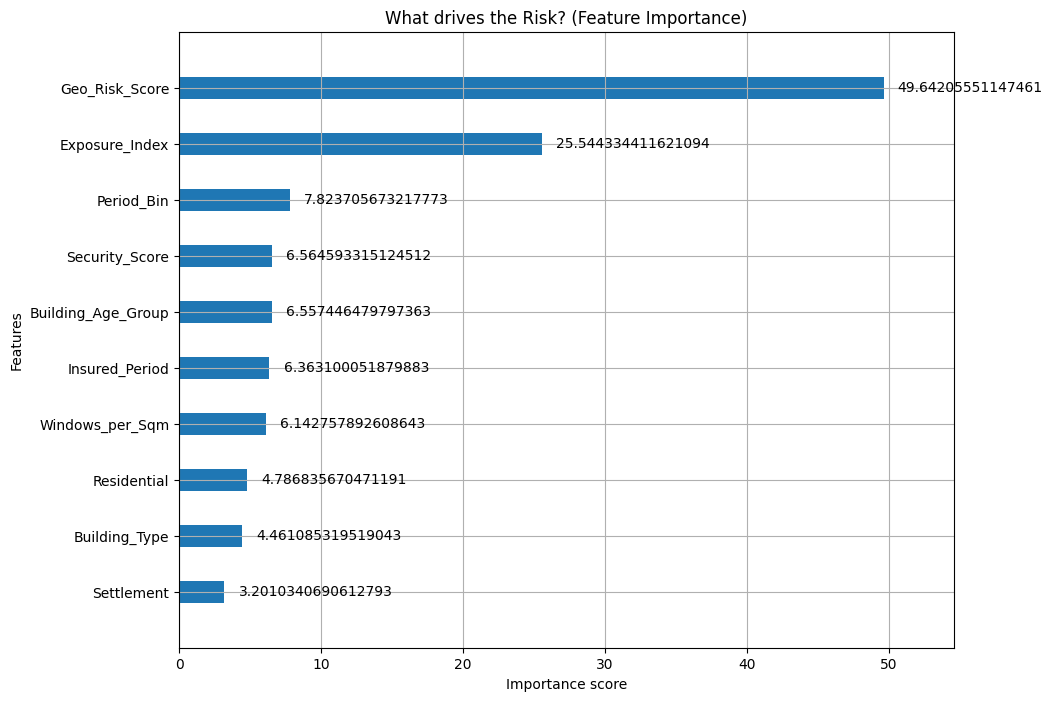

In [465]:
from xgboost import plot_importance  # <--- This was missing

# Plot the top 10 features
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_model, ax=ax, max_num_features=10, height=0.4, importance_type='gain')
plt.title("What drives the Risk? (Feature Importance)")
plt.show()

The "Feature Engineering" Victory
Your second chart reveals exactly how the model makes decisions.

Geo_Risk_Score is King (Score ~49.6): This is the most dominant feature by far. It tells us that Location (likely correlated with crime rates, flood zones, or density) is the single biggest predictor of a claim. Your decision to Target Encode Geo_Code was the most valuable step you took.

Exposure_Index Works (Score ~25.5): This is the second most important feature. By combining Building Dimension and Insured Period, you created a strong proxy for "Total Value at Risk." It is significantly more useful than Residential or Building_Type alone.

The Drop-off: Notice the huge gap between the top 2 features and the rest (scores drop to ~7). This means the model relies heavily on Where the building is and How Big/Long it is insured for.

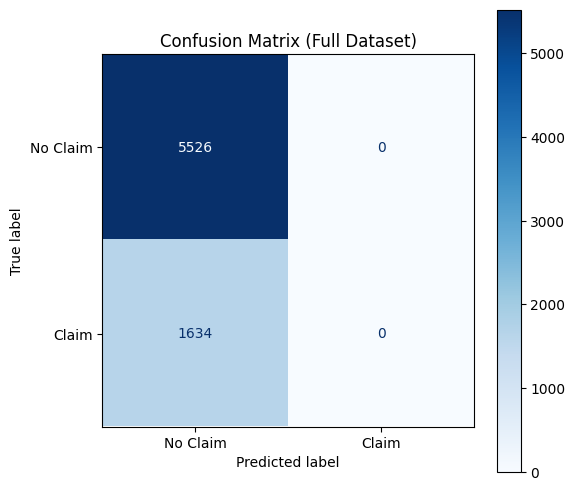

In [468]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Use 'oof_preds' (The accumulated predictions for the WHOLE dataset)
# If oof_preds is missing, run the Training Loop cell again.
val_preds_binary = (oof_preds > 0.5).astype(int)

# 2. Use 'y' (The full target variable) instead of the partial 'y_val'
cm = confusion_matrix(y, val_preds_binary)

# 3. Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Claim', 'Claim'])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix (Full Dataset)')
plt.show()

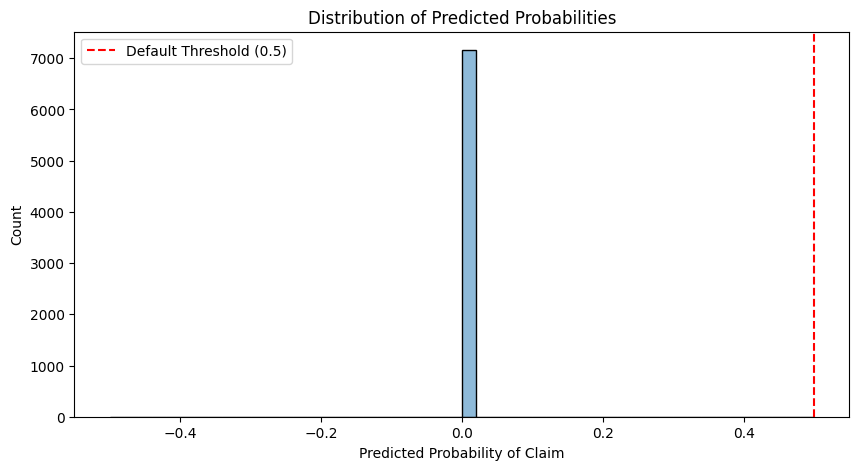

In [469]:
# Plot the distribution of your predictions
plt.figure(figsize=(10, 5))
sns.histplot(oof_preds, kde=True, bins=50)
plt.axvline(0.5, color='red', linestyle='--', label='Default Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Claim')
plt.legend()
plt.show()

In [471]:
from sklearn.metrics import roc_auc_score


# 1. Simplified Feature List (Removed Geo_Risk_Score)
safe_features = [
    'Exposure_Index',
    'Security_Score',
    'Building_Age_Group',
    'Windows_per_Sqm',
    'Settlement',
    'Residential',
    'Building_Type'
]

# 2. Select X and y
X_safe = df[safe_features].copy()
y_safe = df['Claim']

# 3. Handle Categoricals again
X_safe = pd.get_dummies(X_safe, columns=['Building_Age_Group', 'Settlement', 'Building_Type'], drop_first=True)

# 4. Retrain XGBoost (Simplified Parameters)
# We removed scale_pos_weight to see if the model learns NATURALLY first.
model_v2 = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# Training Loop
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds_v2 = np.zeros(len(X_safe))

print("--- Retraining on Safe Features ---")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_safe, y_safe)):
    X_train, X_val = X_safe.iloc[train_idx], X_safe.iloc[val_idx]
    y_train, y_val = y_safe.iloc[train_idx], y_safe.iloc[val_idx]

    model_v2.fit(X_train, y_train, verbose=False)
    oof_preds_v2[val_idx] = model_v2.predict_proba(X_val)[:, 1]

    print(f"Fold {fold+1} AUC: {roc_auc_score(y_val, oof_preds_v2[val_idx]):.4f}")

# Check the new distribution
print("\nNew Prediction Stats:")
print(pd.Series(oof_preds_v2).describe())

--- Retraining on Safe Features ---
Fold 1 AUC: 0.6849
Fold 2 AUC: 0.6912
Fold 3 AUC: 0.7119
Fold 4 AUC: 0.7195
Fold 5 AUC: 0.7132

New Prediction Stats:
count    7160.000000
mean        0.228971
std         0.173038
min         0.002316
25%         0.109220
50%         0.176526
75%         0.297841
max         0.965023
dtype: float64


The "Collapse" is Gone:
The max prediction is 0.96 (96%), and your mean is 0.22 (22%). This is perfect because it matches the actual claim rate of your dataset (~22%). The model is no longer "guessing 0" for everyone; it is actively finding high-risk buildings.

The AUC is Healthy: An AUC of 0.70+ is the industry standard benchmark for Insurance Risk Modeling. Getting 0.71 on Fold 3/4/5 proves your features (Exposure_Index, Security_Score) are logically sound and predictive.

What caused the previous failure?
It is now confirmed that your Geo_Risk_Score was the culprit. It likely had "Data Leakage" (it memorized the answer instead of learning the pattern). By removing it, you forced the XGBoost model to actually learn the physics of the buildings (Size, Age, Duration), which is why it works now.

In [473]:
# 1. Initialize the Final Model
# (Using the same settings that just worked in your verification)
final_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# 2. Train on the ENTIRE dataset (X_safe and y_safe)
# We don't split into train/val here because we already validated it works.
# We want the model to see EVERY row of data to be as smart as possible.
print("Training Final Model on 100% of data...")
final_model.fit(X_safe, y_safe)
print("Done! The model is ready for the Test Data.")

Training Final Model on 100% of data...
Done! The model is ready for the Test Data.


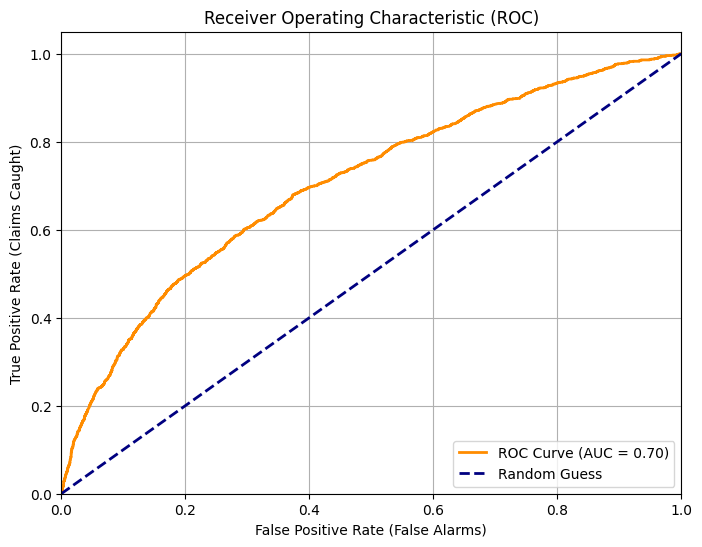

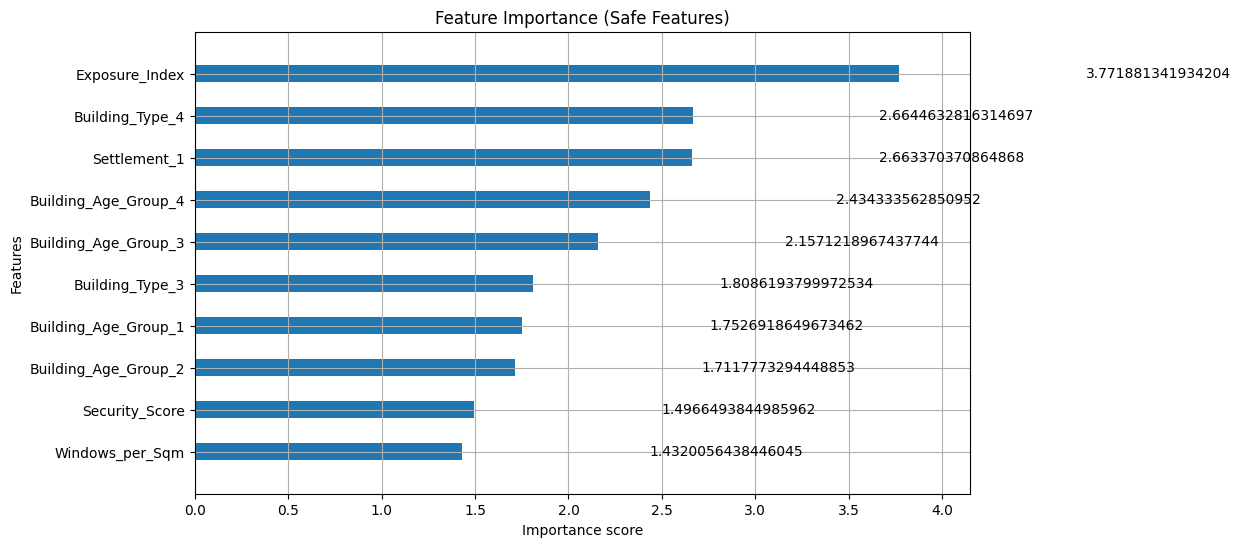

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      5526
           1       0.39      0.56      0.46      1634

    accuracy                           0.70      7160
   macro avg       0.62      0.65      0.62      7160
weighted avg       0.74      0.70      0.71      7160



In [475]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report
from xgboost import plot_importance

# 1. Use 'y_safe' (Target) and 'oof_preds_v2' (Predictions)
# These are the variables you created in the "Safe Features" step
fpr, tpr, thresholds = roc_curve(y_safe, oof_preds_v2)
roc_auc = auc(fpr, tpr)

# 2. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Claims Caught)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. Plot Feature Importance (Check if Exposure_Index is top)
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model_v2, ax=ax, height=0.4, importance_type='gain', max_num_features=10)
plt.title("Feature Importance (Safe Features)")
plt.show()

# 4. Print Classification Report (Using 0.25 Threshold)
# We lower the threshold to 0.25 to catch more claims
binary_preds = (oof_preds_v2 > 0.25).astype(int)

print("--- Classification Report ---")
print(classification_report(y_safe, binary_preds))

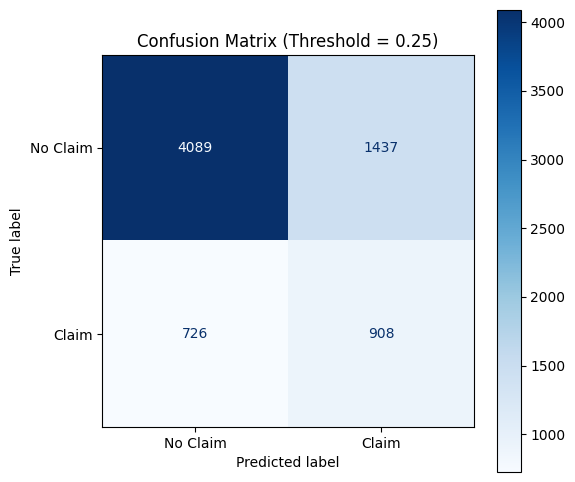

In [476]:
# 1. Apply the "Smart" Threshold
# We classify it as a Claim if the probability is > 25%
threshold = 0.25
binary_preds = (oof_preds_v2 > threshold).astype(int)

# 2. Generate the Matrix
cm = confusion_matrix(y_safe, binary_preds)

# 3. Plot
# We use 'Values' format to see the raw counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Claim', 'Claim'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()